In [1]:
from datetime import datetime
import torch
import torch.nn as nn

class autoencoder(nn.Module):
    def __init__(self,num_features):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_features, 15),
            nn.ReLU(True),
            nn.Linear(15, 7))
        self.decoder = nn.Sequential(
            nn.Linear(7, 15),
            nn.ReLU(True),
            nn.Linear(15, num_features),
            nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

num_features=30
split_point=-1.5

import pickle
file=open('min-max-scaler.pkl','rb')
scaler=pickle.load(file)
file.close()

model = autoencoder(num_features)
model.load_state_dict(torch.load('/Users/john/projects/cloudera-ml/anomaly-detection/creditcard-fraud-minmaxscale-2.model'))
model.eval()


autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=30, out_features=15, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=15, out_features=7, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=7, out_features=15, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=15, out_features=30, bias=True)
    (3): Tanh()
  )
)

In [40]:
def predict(args:dict):
    with torch.no_grad():
        inp=[args['time']]+args['v']+[args['amount']]
        inp=scaler.transform([inp])
        inp=torch.tensor(inp, dtype=torch.float32)
        outp=model(inp)
        loss=torch.sum((inp-outp)**2,dim=1).sqrt().log()
        return loss.item()<split_point

In [1]:
import pandas as pd

data_file='/Users/john/data-sets/creditcard.csv'
data=pd.read_csv(data_file,header=0)

In [42]:
v_cols=data.columns.values[1:-2]
for i in range(10):
    row=data.iloc[i]
    inp={'time':row['Time'],'v':row[v_cols].tolist(),'amount':row['Amount']}
    print(predict(inp),row['Class'])

data=data[data.Class==1]
for i in range(10):
    row=data.iloc[i]
    inp={'time':row['Time'],'v':row[v_cols].tolist(),'amount':row['Amount']}
    print(predict(inp),row['Class'])

True 0.0
True 0.0
False 0.0
True 0.0
True 0.0
True 0.0
True 0.0
True 0.0
True 0.0
True 0.0
False 1.0
True 1.0
False 1.0
False 1.0
False 1.0
False 1.0
False 1.0
False 1.0
False 1.0
False 1.0


In [10]:
import requests, json

v_cols=data.columns.values[1:-2]
url='http://modelservice.ml-e493d729-039.demo-aws.ylcu-atmi.cloudera.site/model'
for i in range(10):
    row=data.iloc[i]
    inp={'time':row['Time'],'v':row[v_cols].tolist(),'amount':row['Amount']}
    body='{"accessKey":"mdefq01xfyue70dqxnsami2o8rnrfxtr","request":'+json.dumps(inp)+'}'
    print(body)
    r = requests.post(url, data=body, headers={'Content-Type': 'application/json'})
    print(r.json())
    #print(predict(inp),row['Class'])

{"accessKey":"mdefq01xfyue70dqxnsami2o8rnrfxtr","request":{"time": 0.0, "v": [-1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.33832076994251803, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.31116935369987897, 1.46817697209427, -0.47040052525947795, 0.20797124192924202, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.12853935827352803, -0.189114843888824, 0.13355837674038698, -0.0210530534538215], "amount": 149.62}}
{'success': True, 'response': True}
{"accessKey":"mdefq01xfyue70dqxnsami2o8rnrfxtr","request":{"time": 0.0, "v": [1.1918571113148602, 0.26615071205963, 0.16648011335321, 0.448154078460911, 0.0600176492822243, -0.0823608088155687, -0.0788029833323113, 0.0851016549148104, -0.255425128109186, -0.16697441400461402, 1.6127266610547901, 1.0652353113

2.9915796296767634


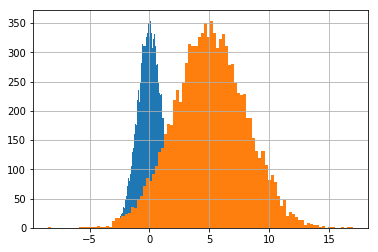

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

s=np.random.normal(size=10000)
print((s*3).std())
pd.Series(s).hist(bins=100)
pd.Series(s*3+5).hist(bins=100)